Name: Prerna Singh, ID: 2023H1230193H, Batch-24 Group_5.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from random import randint


In [ ]:
from google.colab import files
upload=files.upload()


Saving Group_5.csv to Group_5.csv


In [ ]:
data=pd.read_csv('Group_5.csv') #load the data
data.describe()

,x,y
count,700.000000,700.000000
mean,50.500000,4441.012057
std,28.640159,2527.993263
min,1.000000,-598.744000
25%,25.750000,2239.873441
50%,50.500000,4438.872906
75%,75.250000,6607.865033
max,100.000000,9272.114081


In [ ]:
data=data.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [ ]:
X = data['x'].values.reshape(-1, 1)  # 'x' is the input feature
y = data['y'].values.reshape(-1, 1)  # 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# visualise the data

Text(0.5, 1.0, 'Total Dataset')

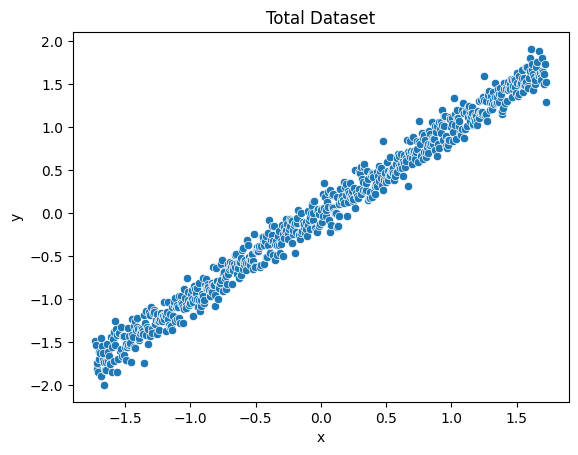

In [ ]:
sns.scatterplot(data=data,x='x',y='y').set_title("Total Dataset")


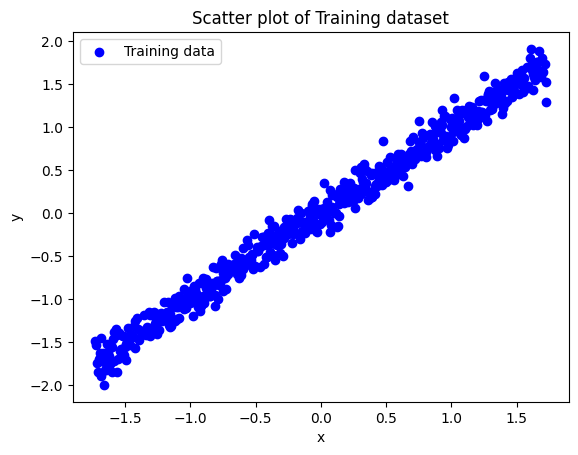

In [ ]:
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Scatter plot of Training dataset")
plt.show()

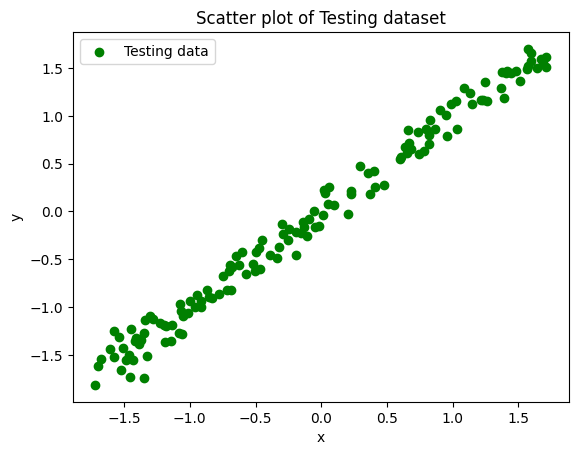

In [ ]:
plt.scatter(X_test, y_test, color="green", label="Testing data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Scatter plot of Testing dataset")
plt.show()


#using the data set finding the coefficients {theta_1 and theta_0} using Linear regression, (without using library functions)

#using normal equation (closed form solution)

In [ ]:
class normal_equation():
    def __init__(self) -> None:
        self.x=None
        self.y=None
        self.theta0=None
        self.theta1=None
    def fit(self,x,y):
        self.x=x
        self.y=y
        Y=pd.DataFrame(y)
        X=pd.DataFrame(x)
        X['ones'] = 1
        X = X[['ones', X.columns[0]]]
        X_transaposed=X.T
        print(f"{X_transaposed.shape} {X.shape} {pd.DataFrame(np.linalg.inv(X_transaposed@X)).shape} {y.shape}")

        XT_X_Inv=pd.DataFrame(np.linalg.inv(X_transaposed @ X))
        XT_y=(X_transaposed @Y)
        print(f"{XT_X_Inv.shape} {XT_y.shape}")
        theta = np.dot(XT_X_Inv, XT_y)
        theta=pd.DataFrame(theta)
        self.theta0, self.theta1 = theta.iloc[0, 0], theta.iloc[1, 0]
        print(f" theta0 ={self.theta0} theta1 ={self.theta1}")
    def compute_cost(self,y,predected_y):
        m=len(predected_y)
        j=(1/(2*m))*((predected_y-y)**2).sum()
        return j

    def predict(self,input_x):
        return self.theta0+self.theta1*input_x

    def compute_mse(self,y,y_pred):
        return ((y_pred-y)**2).mean()
    def plot_graphs(self):

        x = self.x.ravel()
        y = self.y.ravel()

        sns.scatterplot(x=x, y=y, color="blue", label="Original Data") # Use the raveled arrays

        # Generate a range of values for plotting the regression line
        x_range = np.linspace(self.x.min(), self.x.max(), 100)
        y_pred_range = self.predict(pd.Series(x_range))
        plt.plot(x_range, y_pred_range, color="red", label="Regression Line")

        plt.title("Data and Regression Line")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()

        plt.tight_layout()
        plt.show()

In [ ]:
model=normal_equation()
model.fit(X_train,y_train)
y_prediction=model.predict(X_test)
print(f"The MSE value of the normal equation approach is {model.compute_mse(y_test,y_prediction)}")

(2, 560) (560, 2) (2, 2) (560, 1)
(2, 2) (2, 1)
 theta0 =0.0018304561146019528 theta1 =0.9941972802439588
The MSE value of the normal equation approach is 0.015515594323847193


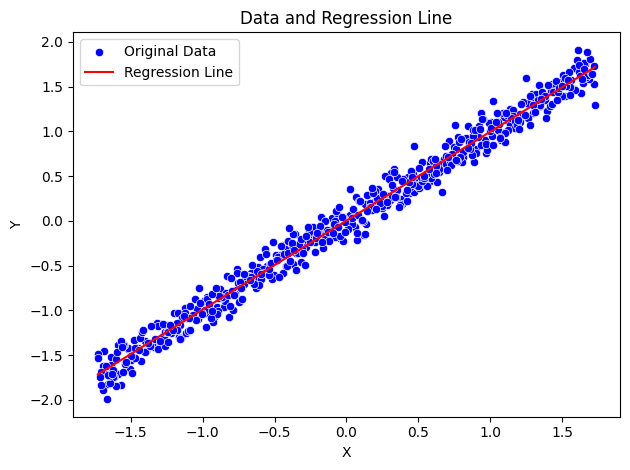

In [ ]:
model.plot_graphs()

#gradient descent

In [ ]:
class regression_gradient_descent():
    def __init__(self) -> None:
        self.theta0=randint(0,100)
        self.theta1=randint(0,100)
        self.cost_history=[]
        self.mse_history=[]
        self.x=None
        self.y=None


    def fit(self,x,y,mse_error):
        i=0
        j=0
        while True:
            y_pred=self.predict(x)
            self.update_coefficients(x,y,alpha=0.0001)
            cost=self.compute_cost(y,y_pred)
            self.cost_history.append(cost)
            mse=self.compute_mse(y,y_pred)
            self.mse_history.append(mse)
            if(mse<=mse_error):break
            i+=1
            if(i==10000):
                print(f"No.of Iterations = {j*10000} cost={cost} mse={mse}")
                i=0
                j+=1

    def update_coefficients(self,x,y,alpha):
        self.x=x
        self.y=y
        y_pred=self.predict(x)
        m=len(y)
        self.theta0=self.theta0 -alpha * ( (1/m) * (y_pred-y).sum() )
        self.theta1=self.theta1 -alpha * ( (1/m) * ((y_pred-y)*x).sum())

    def compute_cost(self,y,predected_y):
        m=len(predected_y)
        j=(1/(2*m))*((predected_y-y)**2).sum()
        return j

    def predict(self,input_x):
        return self.theta0+self.theta1*input_x


    def compute_mse(self,y,y_pred):
        return ((y_pred-y)**2).mean()

    def plot_graphs(self):
        plt.figure(figsize=(18, 6))

        # Subplot 1: Cost Function vs No. Of Iterations
        plt.subplot(1, 3, 1)
        sns.lineplot(data=self.cost_history)
        plt.title("Cost Function vs No. Of Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")

        # Subplot 2: MSE vs No. Of Iterations
        plt.subplot(1, 3, 2)
        sns.lineplot(data=self.mse_history)
        plt.title("MSE vs No. Of Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("MSE")

        # Subplot 3: Scatter Plot with Regression Line
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=self.x.ravel(), y=self.y.ravel(), color="blue", label="Original Data")

        # Generate a range of values for plotting the regression line
        x_range = np.linspace(self.x.min(), self.x.max(), 100)
        y_pred_range = self.predict(pd.Series(x_range))
        plt.plot(x_range, y_pred_range, color="red", label="Regression Line")

        plt.title("Data and Regression Line")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()

        plt.tight_layout()
        plt.show()



In [ ]:
model_gd=regression_gradient_descent()
itheta0,itheta1=model_gd.theta0,model_gd.theta1
model_gd.fit(X_train,y_train,0.015)
out=model_gd.predict(X_train)

No.of Iterations = 0 cost=446.98472763948604 mse=893.9694552789721
No.of Iterations = 10000 cost=58.36577878989648 mse=116.73155757979298
No.of Iterations = 20000 cost=7.62709950504707 mse=15.25419901009414
No.of Iterations = 30000 cost=1.002224024901135 mse=2.0044480498022703
No.of Iterations = 40000 cost=0.13717150288013313 mse=0.27434300576026627
No.of Iterations = 50000 cost=0.024208407150654112 mse=0.048416814301308224
No.of Iterations = 60000 cost=0.00945597658632969 mse=0.018911953172659382
No.of Iterations = 70000 cost=0.007529217527986017 mse=0.015058435055972035


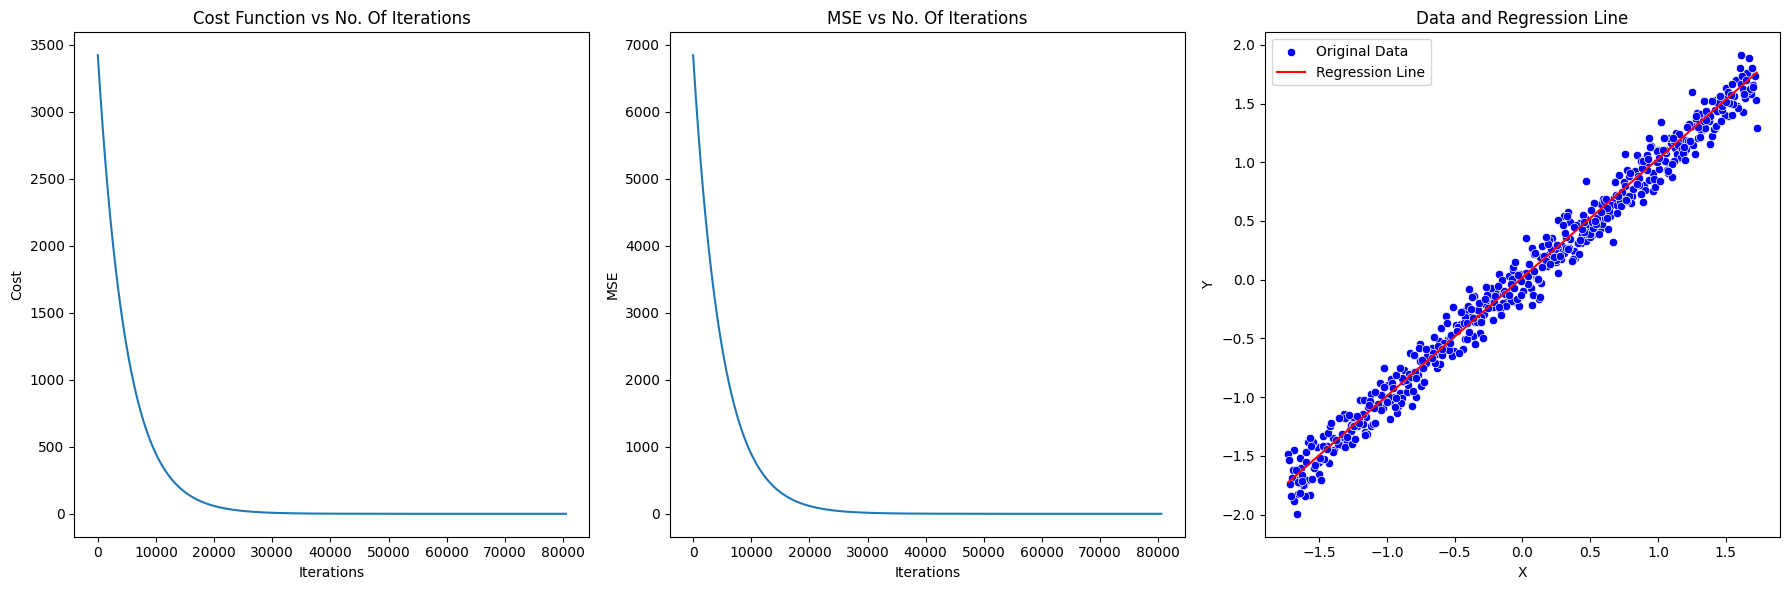

In [ ]:
model_gd.plot_graphs()

In [ ]:
y_prediction=model_gd.predict(X_test)
n =model_gd.compute_mse(y_test,y_prediction)
print(f"The MSE of the gradient descent on Test Dataset {n}")
print(f"Coefficents Before the training theat0 ={itheta0} theata={itheta1}")
print(f"Coefficents After the training theat0 ={model_gd.theta0} theata={model_gd.theta1}")

The MSE of the gradient descent on Test Dataset 0.016535171592351332
Coefficents Before the training theat0 =65 theata=51
Coefficents After the training theat0 =0.019264682003255137 theata=1.008600097661083


In [ ]:
class regression_stochastic_gradient_descent():
    def __init__(self) -> None:
        self.theta0=randint(0,100)
        self.theta1=randint(0,100)
        self.cost_history=[]
        self.mse_history=[]
        self.x=None
        self.y=None

    def fit(self,x,y,mse_error,alpha):
        i=0
        j=0
        self.x=x
        self.y=y
        while True:
            y_pred=self.predict(x)
            self.update_coefficients(x,y,alpha)
            y_pred = self.predict(x)  # Assuming predict method exists
            cost=self.compute_cost(y,y_pred)
            self.cost_history.append(cost)
            mse=self.compute_mse(y,y_pred)
            self.mse_history.append(mse)

            if(mse<=mse_error):break

            i+=1
            if(i==10000):
                print(f"No.of Iterations = {j*10000+10000} cost={cost} mse={mse}")
                i=0
                j+=1

    def update_coefficients(self,x,y,alpha):
        m=len(y)
        index=randint(0,len(y)-1)
        y_pred=self.predict(x[index])
        self.theta0=self.theta0 -alpha * ( (1/m) * (y_pred-y[index]))
        self.theta1=self.theta1 -alpha * ( (1/m) * ((y_pred-y[index])*x[index]))

    def compute_cost(self,y,predected_y):
        m=len(predected_y)
        j=(1/(2*m))*((predected_y-y)**2).sum()
        return j

    def predict(self,input_x):
        return self.theta0+self.theta1*input_x

    def compute_mse(self,y,y_pred):
        return ((y_pred-y)**2).mean()

    def plot_graphs(self):
        plt.figure(figsize=(18, 6))

        # Subplot 1: Cost Function vs No. Of Iterations
        plt.subplot(1, 3, 1)
        sns.lineplot(data=self.cost_history)
        plt.title("Cost Function vs No. Of Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")

        # Subplot 2: MSE vs No. Of Iterations
        plt.subplot(1, 3, 2)
        sns.lineplot(data=self.mse_history)
        plt.title("MSE vs No. Of Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("MSE")

        # Subplot 3: Scatter Plot with Regression Line
        plt.subplot(1, 3, 3)
        x_values = self.x.values.ravel() if isinstance(self.x, pd.Series) else self.x.ravel()
        y_values = self.y.values.ravel() if isinstance(self.y, pd.Series) else self.y.ravel()
        sns.scatterplot(x=x_values, y=y_values, color="blue", label="Original Data")


        # Generate a range of values for plotting the regression line
        x_range = np.linspace(self.x.min(), self.x.max(), 100)
        y_pred_range = self.predict(pd.Series(x_range))
        plt.plot(x_range, y_pred_range, color="red", label="Regression Line")

        plt.title("Data and Regression Line")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()

        plt.tight_layout()
        plt.show()


In [ ]:
model_sgd=regression_stochastic_gradient_descent()
itheta0,itheta1=model_sgd.theta0,model_sgd.theta1
model_sgd.fit(X_train,y_train,0.015,0.01)
out=model_sgd.predict(X_test)
model_sgd.compute_mse(y_test,out)

No.of Iterations = 10000 cost=554.2935414418747 mse=1108.5870828837494
No.of Iterations = 20000 cost=387.42996921983365 mse=774.8599384396674
No.of Iterations = 30000 cost=271.9893289012109 mse=543.9786578024219
No.of Iterations = 40000 cost=190.08509100609308 mse=380.17018201218616
No.of Iterations = 50000 cost=132.5549604827003 mse=265.1099209654006
No.of Iterations = 60000 cost=92.87290410368314 mse=185.74580820736628
No.of Iterations = 70000 cost=64.7666781100545 mse=129.533356220109
No.of Iterations = 80000 cost=45.38924159919464 mse=90.77848319838928
No.of Iterations = 90000 cost=31.725326979757444 mse=63.45065395951489
No.of Iterations = 100000 cost=22.279594750682957 mse=44.559189501365914
No.of Iterations = 110000 cost=15.715231168161232 mse=31.430462336322464
No.of Iterations = 120000 cost=10.99212665166664 mse=21.98425330333328
No.of Iterations = 130000 cost=7.704973111022965 mse=15.409946222045932
No.of Iterations = 140000 cost=5.3635092148469585 mse=10.727018429693917
No.o

0.01649308316984423

In [ ]:
y_prediction=model_sgd.predict(X_test)
n =model_sgd.compute_mse(y_test,y_prediction)
print(f"The MSE of the stohastic gradient descent on Test Dataset {n}")
print(f"Coefficents Before the training theat0 ={itheta0} theata={itheta1}")
print(f"Coefficents After the training theat0 ={model_sgd.theta0} theata={model_sgd.theta1}")

The MSE of the stohastic gradient descent on Test Dataset 0.01649308316984423
Coefficents Before the training theat0 =15 theata=38
Coefficents After the training theat0 =[0.00607868] theata=[1.01673803]


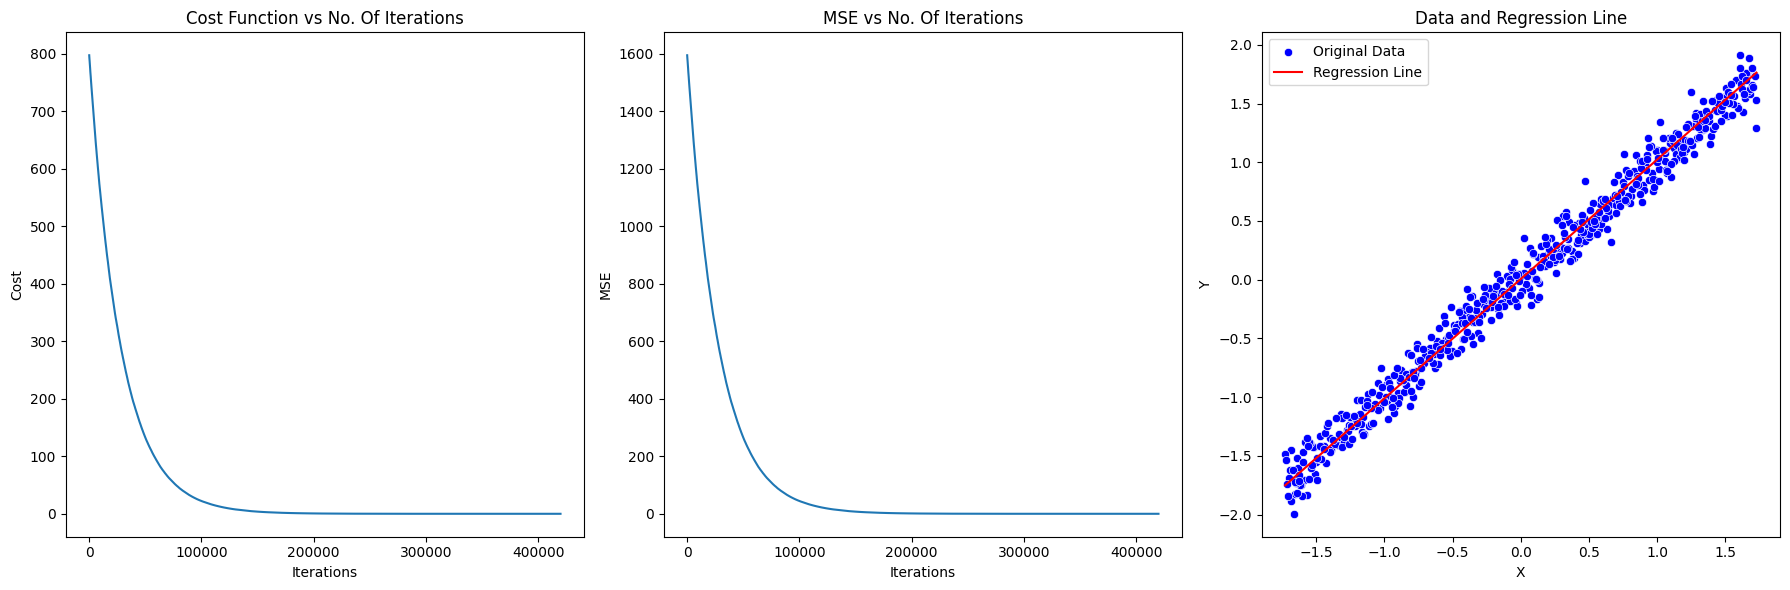

In [ ]:
model_sgd.plot_graphs()

#Finding Coefficents using libraries

#Linear Regression

Normal Equation - Training MSE: 0.015030750971505214, Test MSE: 0.013384181581396315
Coefficients: [[0.99003801]], Intercept: [0.00373001]


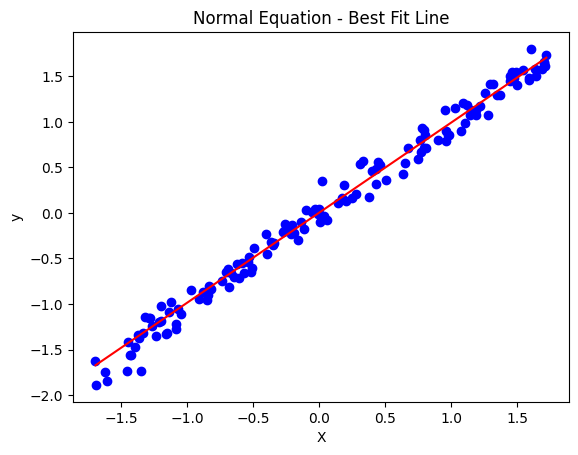

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Normal Equation - Training MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Coefficients: {model.coef_}, Intercept: {model.intercept_}")

# Plotting the results
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red')
plt.title('Normal Equation - Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


#Gradient Descent

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Descent - Training MSE: 0.015152012492469419, Test MSE: 0.013249327794775834
Coefficients: [1.00107008], Intercept: [0.00439859]
Intercept (b): 0.0036874349810656695
Slope (m): 0.990339000598519
Mean Squared Error on the 0.013374919855904964


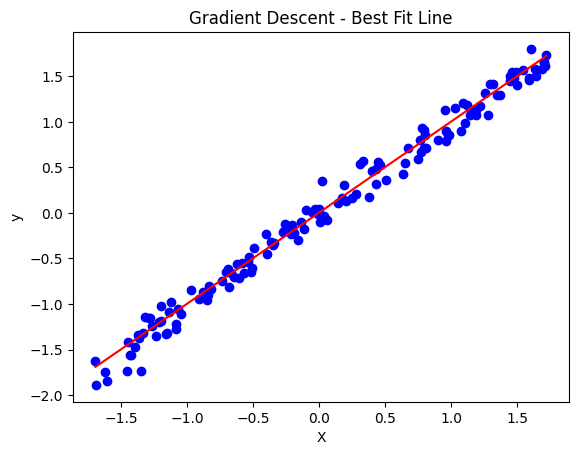

In [ ]:
from sklearn.linear_model import SGDRegressor

# Initialize and fit the model using Gradient Descent
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01, random_state=42)
sgd_model.fit(X_train, y_train)

# Predictions
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Gradient Descent - Training MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Coefficients: {sgd_model.coef_}, Intercept: {sgd_model.intercept_}")

# Plotting the results
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red')
plt.title('Gradient Descent - Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
import numpy as np
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=1000, tol=1e-3)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
# Output the slope (m) and intercept (b)
print(f"Intercept (b): {model.intercept_[0]}")
print(f"Slope (m): {model.coef_[0]}")
print(f"Mean Squared Error on the {mse(y_test,prediction)}")
plt.show()

#SGD

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stochastic Gradient Descent - Training MSE: 0.03615963845006484, Test MSE: 0.03855640961274609
Coefficients: [1.06832215], Intercept: [0.12741973]


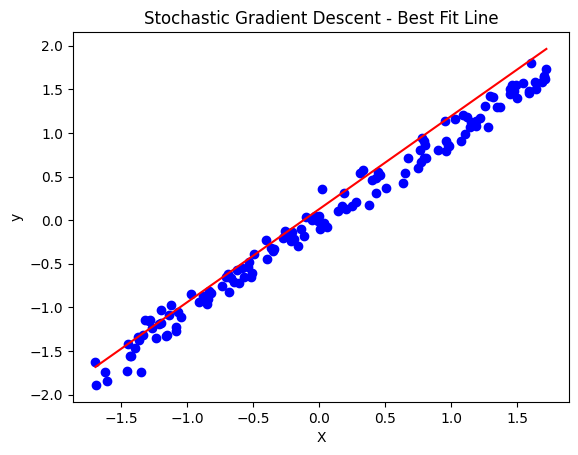

In [ ]:
sgd_model = SGDRegressor(max_iter=100000000, tol=1e-3, learning_rate='optimal', random_state=42)
sgd_model.fit(X_train, y_train)

# Predictions
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Stochastic Gradient Descent - Training MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Coefficients: {sgd_model.coef_}, Intercept: {sgd_model.intercept_}")

# Plotting the results
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red')
plt.title('Stochastic Gradient Descent - Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.show()